# Chapter 3: Exercise 8

**Import packages**

In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ISLP.models import ModelSpec as MS
from statsmodels.stats.outliers_influence import OLSInfluence

**Load Auto data set**

In [2]:
os.chdir('C:/Users/carma/Documents/Python Projects/islp')
Auto = pd.read_csv('Auto.csv', na_values=['?'])

**Remove rows with missing values**

In [3]:
Auto = Auto.dropna().reset_index().drop(columns='index')

**View first five observations**

In [4]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


**Extract variables for ordinary least squares**

In [5]:
design = MS(['horsepower'])
X = design.fit_transform(Auto)
y = Auto['mpg']

In [6]:
X[:3]

,intercept,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0


In [7]:
y[:3]

0    18.0
1    15.0
2    18.0
Name: mpg, dtype: float64

**Fit the linear model**

In [8]:
model = sm.OLS(y, X)
results = model.fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           7.03e-81
Time:                        21:02:33   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

**Predicted mpg associated with a horsepower of 98**

In [10]:
prediction = results.get_prediction(pd.DataFrame({'intercept': [1], 'horsepower': [98]}))
prediction.predicted_mean

array([24.46707715])

**Associated 95% confidence interval**

In [11]:
prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

**Associated 95% prediction interval**

In [12]:
prediction.conf_int(alpha=0.05, obs=True)

array([[14.80939607, 34.12475823]])

### (a) Comments on output of simple linear regression
1. There is a relationship between horsepower and mpg.
2. There is a strong relationship as seen by the p-value corresponding to the t-statistic for horsepower.
3. The relationship between horsepower and mpg is negative as seen by the $-0.1578$ coefficient for horsepower in the least squares line.
4. 
    - The predicted mpg associated with a horsepower of $98$ is $24.47$  
    - The 95% confidence interval is $(23.97, 24.96)$.
    - The 95% prediction interval is $(14.81, 34.12)$.

### (b) Plot of response and predictor along with least squares regression line

**Define function for plotting line**

In [13]:
def abline(ax, b, m, *args, **kwargs):
    # Add a line with slope m and intercept b to ax
    xlim = ax.get_xlim()
    ylim = [m*xlim[0] + b, m*xlim[1] + b]
    ax.plot(xlim, ylim, *args, *kwargs)

**Scatter plot with line of best fit**

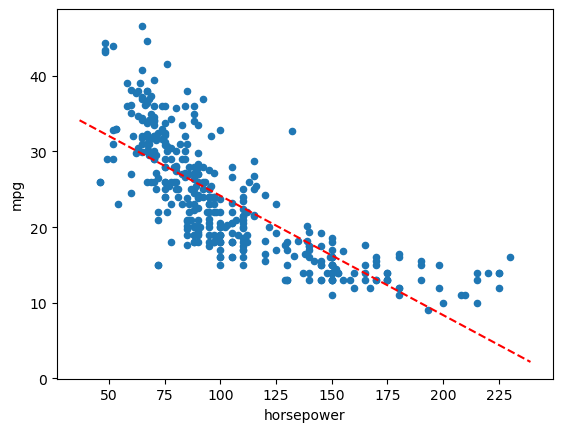

In [14]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, 
       results.params[0],
       results.params[1],
       'r--')

### (c) Diagnostic plots of the least squares regression fit along with observations

In [15]:
results.fittedvalues.head()

0    19.416046
1    13.891480
2    16.259151
3    16.259151
4    17.837598
dtype: float64

In [16]:
results.resid.head()

0   -1.416046
1    1.108520
2    1.740849
3   -0.259151
4   -0.837598
dtype: float64

In [17]:
y.head() - results.fittedvalues[:5]

0   -1.416046
1    1.108520
2    1.740849
3   -0.259151
4   -0.837598
dtype: float64

**Residual Plot**

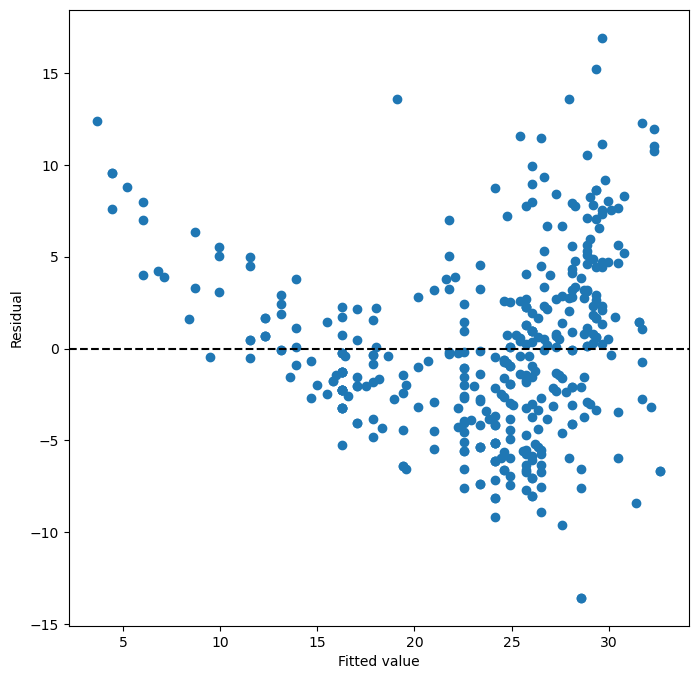

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.axhline(0, c='k', ls='--')
plt.show()

The residuals exhibit a clear U-shape, which provides a strong indication of non-linearity in the data (as can be seen in the scatter plot from part **(b)**). *In general*, a strong pattern in the residuals indicates non-linearity in the data.

**Looking for high leverage points**

115

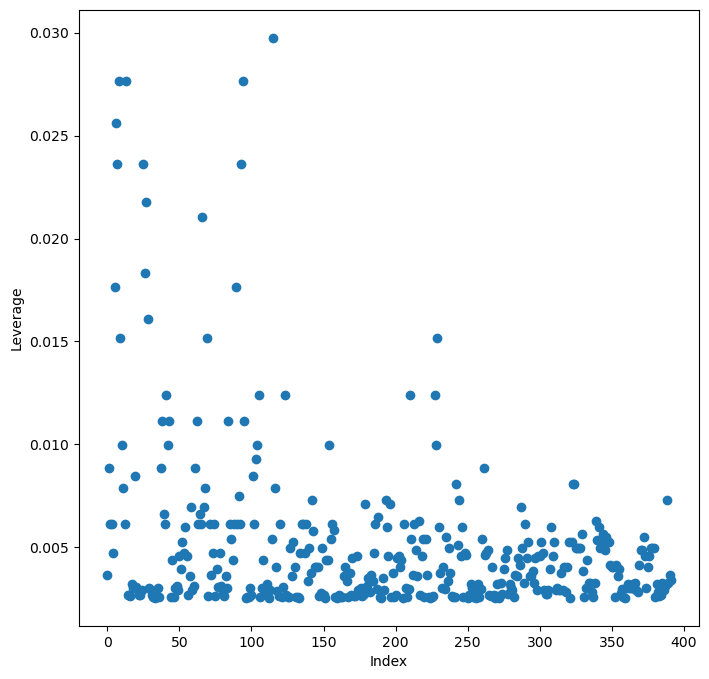

In [19]:
infl = results.get_influence()
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
plt.xlabel('Index')
plt.ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Verifying the average leverage for all the observations is equal to $\frac{p+1}{n}$. This is always true.

In [20]:
np.average(infl.hat_matrix_diag)

0.005102040816326529

In [21]:
2/392

0.00510204081632653

In [22]:
infl.hat_matrix_diag[115]
np.max(infl.hat_matrix_diag)

0.02975300179092141

If a given observation has a leverage statistic that greatly exceeds $\frac{p+1}{n}$, then we may suspect that the corresponding point has high leverage. Since observation 115 along with a few others as seen in the graph are greater than four times the average leverage, we conclude they have high leverage. This means they may have unusual values for horsepower. If conducting further analysis we may opt to remove these from our data set.

**Computing studentized residuals**

In [23]:
stu_res = results.get_influence().get_resid_studentized_external()

Text(0, 0.5, 'Studentized Residuals')

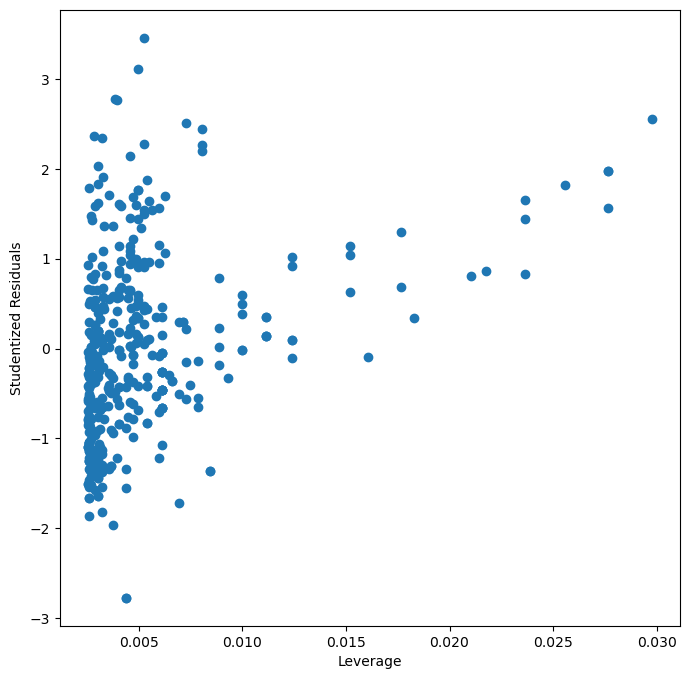

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(infl.hat_matrix_diag, stu_res)
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

There are no points that have high leverage *and* a high studentized residual. We consider a studentized residual to be high if its absolute value is greater than 3. There are however two points with high studentized residuals suggesting they may be considered outliers in our data set.

In [25]:
[(x[0], x[1]) for x in enumerate(stu_res) if np.abs(x[1]) > 3]

[(320, 3.4589085384404576), (327, 3.1142561792533385)]

In [26]:
(Auto['horsepower'].iloc[320], Auto['mpg'].iloc[320])

(65.0, 46.6)

In [27]:
(Auto['horsepower'].iloc[327], Auto['mpg'].iloc[327])

(67.0, 44.6)

These two observations may be considered as outliers and possibly removed from our model.